In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
import torch
from src.data_ops.variable_dataset import VariableDataset

c:\Users\HP\.conda\envs\derienv_dl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Get all data points
dataset = VariableDataset(x_len=10)
dataset.load_from_csv(Path.cwd().parent/'data/variables.csv')

X1 = []
X2 = []
Y_dev = []
for i in range(len(dataset)):
    x1,x2,y_dev = dataset[i]
    y = y_dev + x1[0,-1]
    X1.append(torch.hstack([x1,y[...,None]]).cpu().numpy().squeeze())
    X2.append(x2.cpu().numpy())
    Y_dev.append(y_dev.cpu().numpy())
Y_dev = np.asarray(Y_dev)
X1 = np.asarray(X1)


In [3]:
# Find main variable data jumping to a large value
outliers_idxs = np.where(np.mean(np.abs(X1[:,:dataset._x_len]),axis=1)<np.abs(X1[:,dataset._x_len]/10))
outliers_X1 = X1[outliers_idxs]
outliers_X2 = list(map(X2.__getitem__,outliers_idxs[0].tolist()))

[0.101]


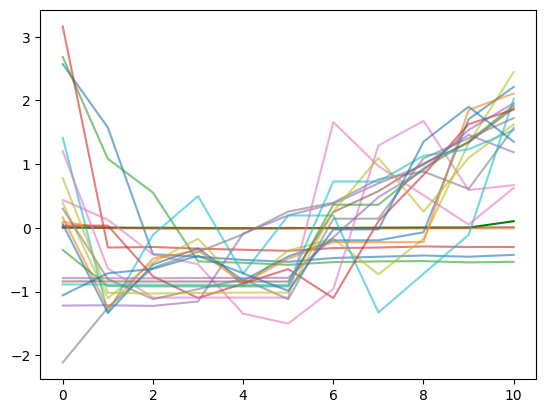

In [12]:
## Visualize outliers
outlier_idx = 10
idx = outliers_idxs[0][outlier_idx]
plt.plot(X1[idx],c='g')
print(Y_dev[idx])
for i in range(X2[idx].shape[0]):
    plt.plot(X2[idx][i],alpha=0.6)

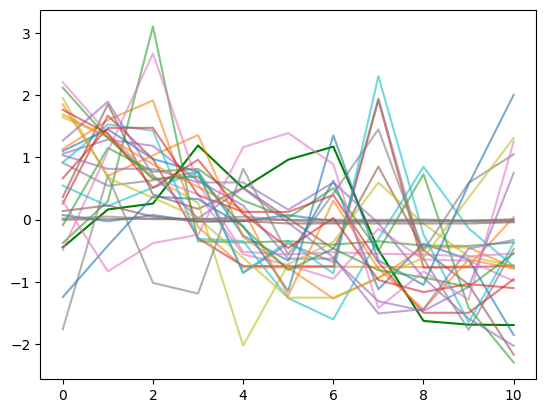

In [13]:
## Visualize normal data (without outliers)
idxs = set(range(X1.shape[0]))- set(outliers_idxs[0].tolist())
idx = 2
plt.plot(X1[idx],c='g')
for i in range(X2[idx].shape[0]):
    plt.plot(X2[idx][i],alpha=0.6)

(array([  11.,   16.,   30.,   43.,   45.,   82.,  200.,  534., 1361.,
        5088., 6672., 1531.,  433.,  159.,   62.,   25.,   11.,   10.,
          10.]),
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 <BarContainer object of 19 artists>)

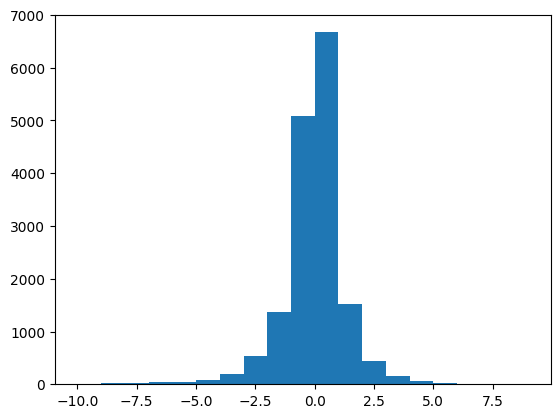

In [24]:
# Visualize historgram of predicting difference
plt.hist(Y_dev,bins=range(-10,10,1))
